# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [10]:
data_2019['forma_pago'] = data_2019['forma_pago'].replace(['T. DISCAPACIDAD'],'TARJETA DISCAPACIDAD')
print(data_2019['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'TARJETA DISCAPACIDAD']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
dataset.describe().round(decimals=2)

,hora_fin,cantidad_pasos
count,238869.00,238869.00
mean,11.87,200.38
std,6.74,403.25
min,0.00,1.00
25%,6.00,2.00
50%,12.00,11.00
75%,18.00,104.00
max,23.00,2416.00


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


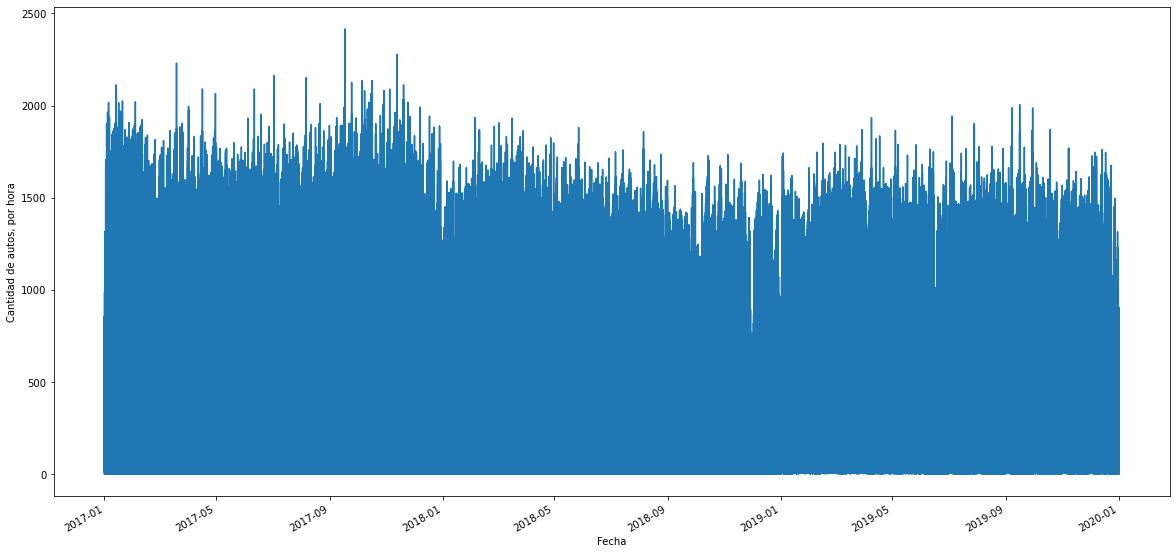

In [16]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (20,10))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por hora')
#plt.tick_params(labelsize=8, rotation=90)
plt.gcf().autofmt_xdate()
plt.show()

In [17]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


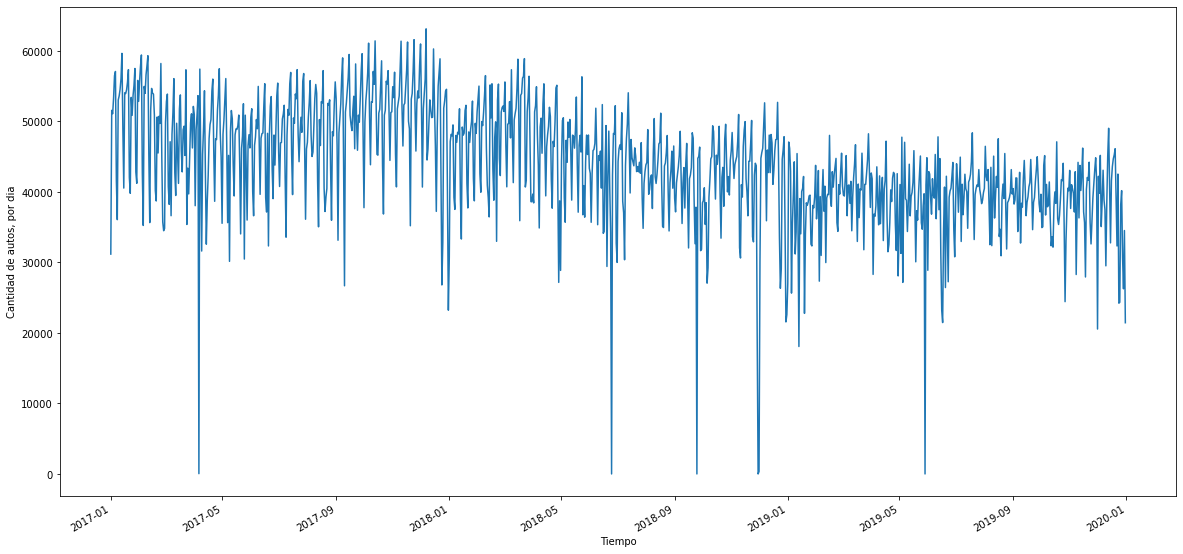

In [18]:
plt.figure(figsize = (20,10))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.gcf().autofmt_xdate()
plt.show()

In [19]:
#Resampleamos nuestros datos para agrupar por semana, y asi tal vez lograr una visualización mas amigable
semana = dataset.resample('W', on = 'fecha').sum()
print(semana.shape)
semana.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


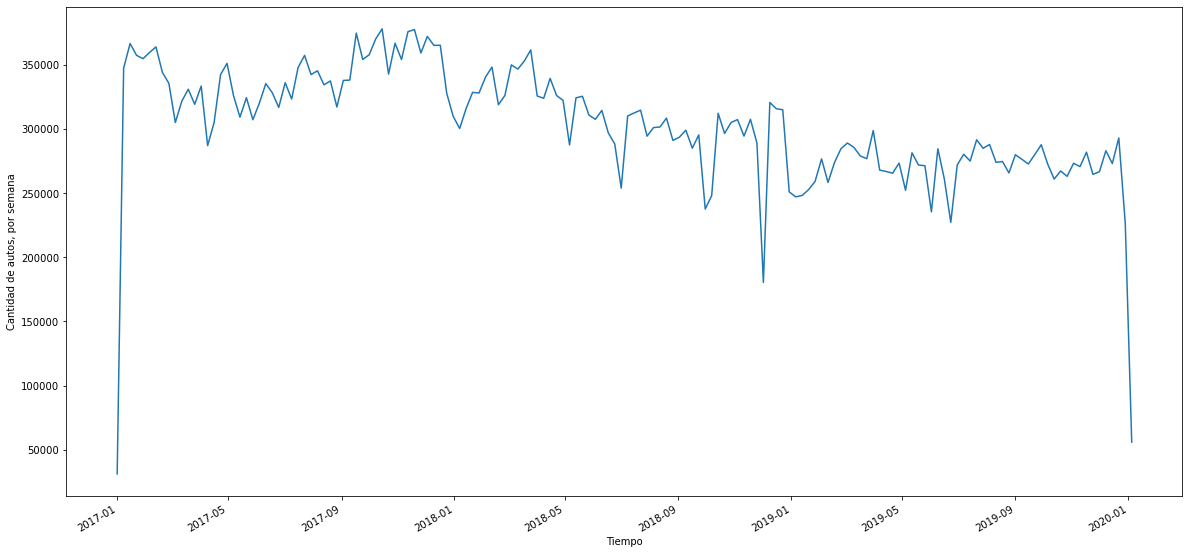

In [20]:
plt.figure(figsize = (20,10))
plt.plot(semana.index, semana.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.gcf().autofmt_xdate()
plt.show()

In [21]:
#Resampleamos nuestros datos para agrupar por mes, y asi tal vez lograr una visualización mas amigable
mes = dataset.resample('M', on = 'fecha').sum()
print(mes.shape)
mes.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


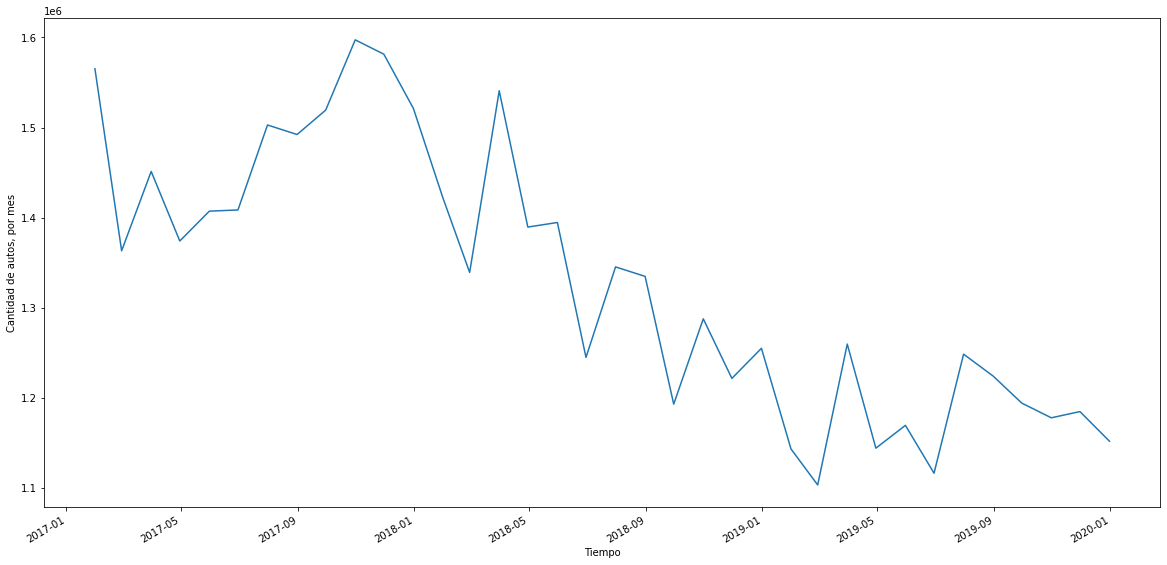

In [22]:
plt.figure(figsize = (20,10))
plt.plot(mes.index, mes.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.gcf().autofmt_xdate()
plt.show()

# Zoom y filtro

In [25]:
#mask2 = (dataset['fecha'] > '2017-05-01') & (dataset['fecha'] <= '2018-03-31')
#dataset2 = dataset[mask2]
#dataset2.head()

In [26]:
#semana2 = dataset2.resample('W', on = 'fecha').sum()
#print(semana2.shape)
#semana2.head()

In [27]:
#plt.figure(figsize = (20,10))
#plt.plot(semana2.index, semana2.cantidad_pasos)
#plt.xlabel('Tiempo')
#plt.ylabel('Cantidad de autos, por semana')
#plt.gcf().autofmt_xdate()
#plt.show()

In [28]:
#mask3 = (dataset.tipo_vehiculo=='Liviano')
#dataset3 = dataset[mask3]

In [29]:
#dataset3.head()

In [30]:
#dataset3.describe()

In [31]:
#plt.figure(figsize = (15,6))
#plt.plot(dataset3.fecha, dataset3.cantidad_pasos)
#plt.xlabel('Fecha')
#plt.ylabel('Cantidad de autos, por hora')
#plt.show()

In [32]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
#diario3 = dataset3.resample('D', on = 'fecha').sum()
#print(diario3.shape)
#diario3.describe()

In [33]:
#plt.figure(figsize = (15,6))
#plt.plot(diario3.index, diario3.cantidad_pasos)
#plt.xlabel('Tiempo')
#plt.ylabel('Cantidad de autos, por dia')
#plt.show()

# Prophet: Preparación

In [69]:
df = dataset.reset_index()

In [70]:
mes1 = df.resample('M', on = 'fecha').sum()

In [71]:
mes1 = mes1.reset_index()

In [72]:
mes1=mes1.rename(columns={'fecha':'ds', 'cantidad_pasos':'y'})

In [73]:
mes1

,ds,index,y
0,2017-01-31,46334751,1565260
1,2017-02-28,119804355,1363113
2,2017-03-31,208843699,1451214
3,2017-04-30,267359598,1373985
4,2017-05-31,357172002,1407136
5,2017-06-30,421063848,1408464
6,2017-07-31,513686250,1502820
7,2017-08-31,559645497,1492232
8,2017-09-30,623470280,1519327
9,2017-10-31,712713723,1597356


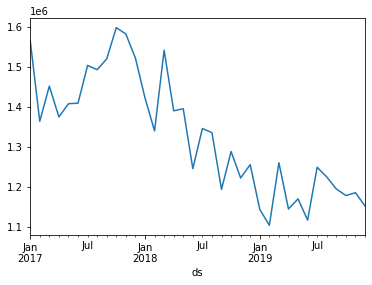

In [74]:
mes1.set_index('ds').y.plot()

In [ ]:
mes1['y_orig'] = mes1['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
mes1['y'] = np.log(mes1['y'])

In [76]:
mes1.tail()

,ds,index,y
31,2019-08-31,668543463,14.017627
32,2019-09-30,654063410,13.992820
33,2019-10-31,686245615,13.979029
34,2019-11-30,672132887,13.984882
35,2019-12-31,692289018,13.956702


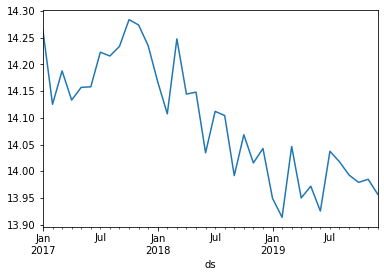

In [77]:
mes1.set_index('ds').y.plot()

# **PROPHET**

In [79]:
model = Prophet()
model.fit(mes1);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
future = model.make_future_dataframe(periods=9, freq = 'M')
future.tail()

,ds
43,2020-08-31
44,2020-09-30
45,2020-10-31
46,2020-11-30
47,2020-12-31


In [97]:
forecast = model.predict(future)

In [101]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-31,14.283050,14.249937,14.274814,14.283050,14.283050,-0.021033,-0.021033,-0.021033,-0.021033,-0.021033,-0.021033,0.0,0.0,0.0,14.262017
1,2017-02-28,14.240582,14.111932,14.136032,14.240582,14.240582,-0.116711,-0.116711,-0.116711,-0.116711,-0.116711,-0.116711,0.0,0.0,0.0,14.123871
2,2017-03-31,14.193566,14.178293,14.203778,14.193566,14.193566,-0.002773,-0.002773,-0.002773,-0.002773,-0.002773,-0.002773,0.0,0.0,0.0,14.190793
3,2017-04-30,14.148381,14.121198,14.145485,14.148381,14.148381,-0.015091,-0.015091,-0.015091,-0.015091,-0.015091,-0.015091,0.0,0.0,0.0,14.133291
4,2017-05-31,14.121006,14.149756,14.173421,14.121006,14.121006,0.040406,0.040406,0.040406,0.040406,0.040406,0.040406,0.0,0.0,0.0,14.161413


In [98]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43,2020-08-31,13.896454,13.688543,14.089617,13.692142,14.096081,-0.002233,-0.002233,-0.002233,-0.002233,-0.002233,-0.002233,0.0,0.0,0.0,13.894221
44,2020-09-30,13.891129,13.601078,14.088735,13.640655,14.128744,-0.035700,-0.035700,-0.035700,-0.035700,-0.035700,-0.035700,0.0,0.0,0.0,13.855429
45,2020-10-31,13.885628,13.657852,14.246768,13.576989,14.170725,0.081786,0.081786,0.081786,0.081786,0.081786,0.081786,0.0,0.0,0.0,13.967414
46,2020-11-30,13.880303,13.589373,14.269006,13.519531,14.206131,0.063727,0.063727,0.063727,0.063727,0.063727,0.063727,0.0,0.0,0.0,13.944030
47,2020-12-31,13.874802,13.511360,14.304751,13.467136,14.257196,0.043199,0.043199,0.043199,0.043199,0.043199,0.043199,0.0,0.0,0.0,13.918001


In [99]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2020-08-31,13.894221,13.688543,14.089617
44,2020-09-30,13.855429,13.601078,14.088735
45,2020-10-31,13.967414,13.657852,14.246768
46,2020-11-30,13.944030,13.589373,14.269006
47,2020-12-31,13.918001,13.511360,14.304751


Predicción de 2020

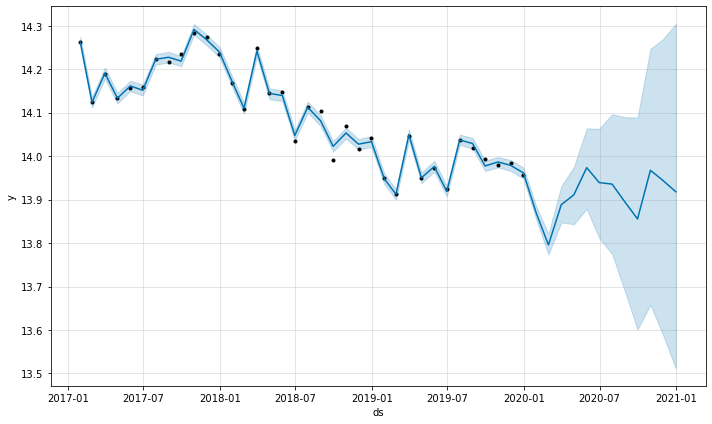

In [100]:
model.plot(forecast);

Tendencia y estacionalidad

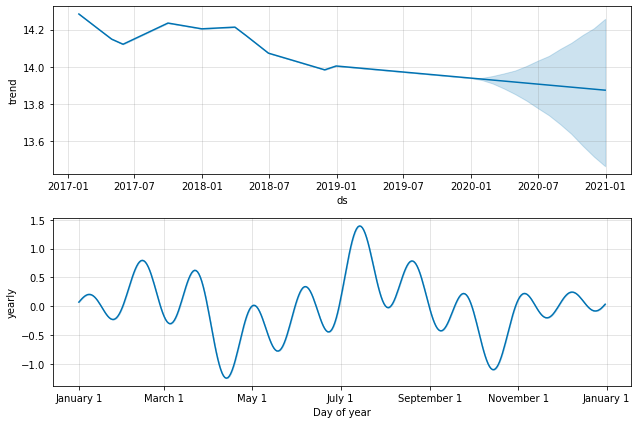

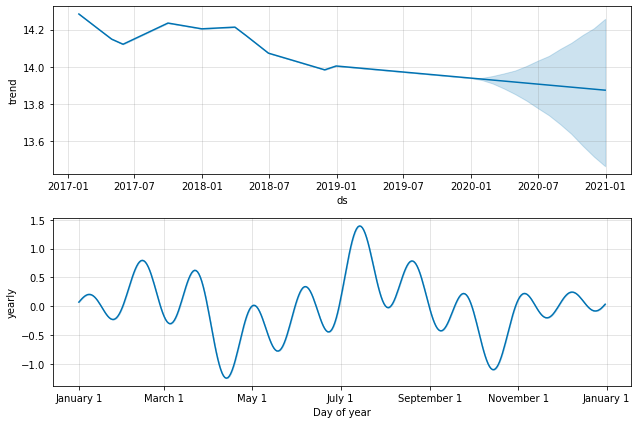

In [104]:
model.plot_components(forecast)

In [105]:
forecast_orig = forecast # make sure we save the original forecast data
forecast_orig['yhat'] = np.exp(forecast_orig['yhat'])
forecast_orig['yhat_lower'] = np.exp(forecast_orig['yhat_lower'])
forecast_orig['yhat_upper'] = np.exp(forecast_orig['yhat_upper'])

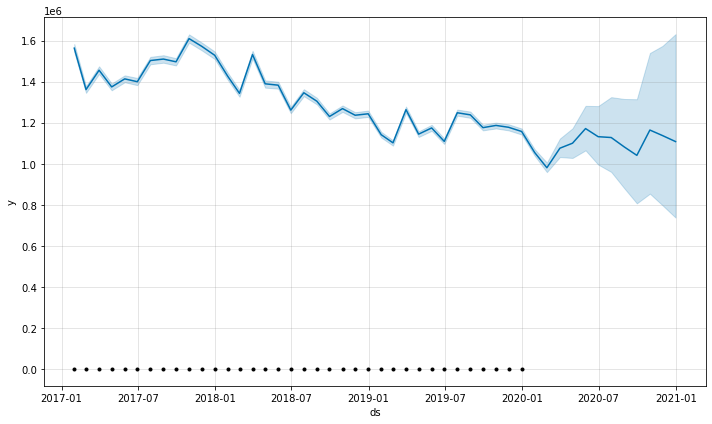

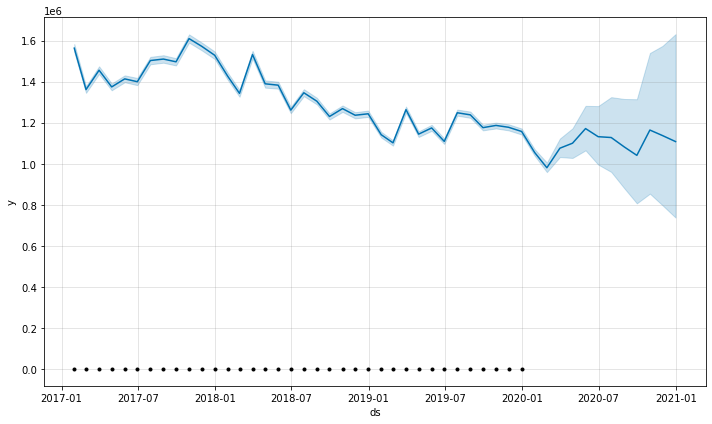

In [106]:
model.plot(forecast_orig)

In [108]:
mes1['y_log']=mes1['y'] #copy the log-transformed data to another column
mes1['y']=mes1['y'] #copy the original data to 'y'

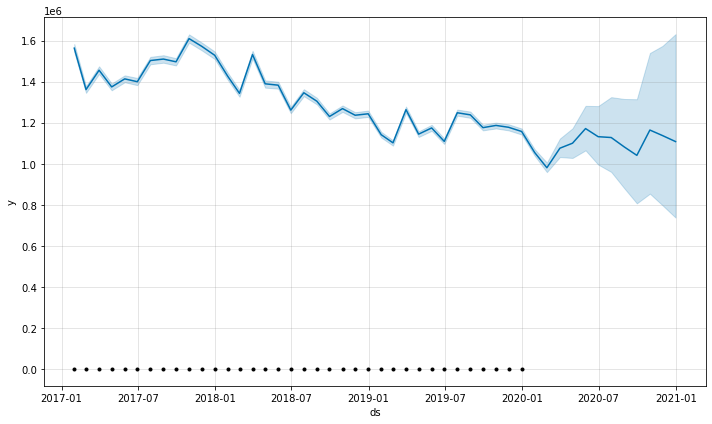

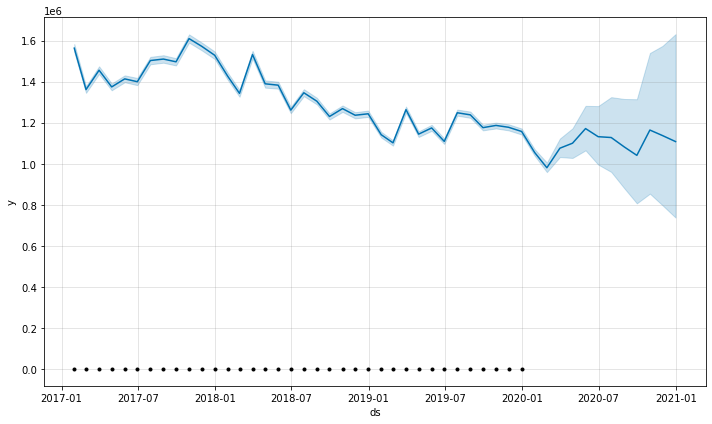

In [109]:
model.plot(forecast_orig)

ACÁMICA 2020

In [122]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [123]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [124]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [125]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']


In [126]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask20 = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask20]

#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

data_2020.head()

,fecha,mes,dia,dia_fecha,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos
52,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Efectivo,Centro,326
53,2020-01-01 00:00:00,enero,Miércoles,1,1,Auto,Efectivo,Provincia,319
134,2020-01-01 00:00:00,enero,Miércoles,1,2,Auto,Efectivo,Centro,199
135,2020-01-01 00:00:00,enero,Miércoles,1,2,Auto,Efectivo,Provincia,180
202,2020-01-01 00:00:00,enero,Miércoles,1,3,Auto,Efectivo,Centro,114


In [128]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020.head()

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha2
52,enero,Miércoles,1,Auto,Efectivo,Centro,326,2020-01-01 01:00:00
53,enero,Miércoles,1,Auto,Efectivo,Provincia,319,2020-01-01 01:00:00
134,enero,Miércoles,1,Auto,Efectivo,Centro,199,2020-01-01 02:00:00
135,enero,Miércoles,1,Auto,Efectivo,Provincia,180,2020-01-01 02:00:00
202,enero,Miércoles,1,Auto,Efectivo,Centro,114,2020-01-01 03:00:00


In [129]:
#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha
52,enero,Miércoles,1,Auto,Efectivo,Centro,326,2020-01-01 01:00:00
53,enero,Miércoles,1,Auto,Efectivo,Provincia,319,2020-01-01 01:00:00
134,enero,Miércoles,1,Auto,Efectivo,Centro,199,2020-01-01 02:00:00
135,enero,Miércoles,1,Auto,Efectivo,Provincia,180,2020-01-01 02:00:00
202,enero,Miércoles,1,Auto,Efectivo,Centro,114,2020-01-01 03:00:00


In [130]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020

,mes,dia,dia_fecha,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha
0,enero,Miércoles,1,Auto,Efectivo,Centro,467,2020-01-01 00:00:00
1,enero,Miércoles,1,Moto,Efectivo,Centro,7,2020-01-01 00:00:00
2,enero,Miércoles,1,Auto,Efectivo,Provincia,423,2020-01-01 00:00:00
3,enero,Miércoles,1,Moto,Efectivo,Provincia,6,2020-01-01 00:00:00
4,enero,Miércoles,1,Pesados 2 Ejes,Efectivo,Centro,1,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...
39067,septiembre,Miércoles,30,Pesados 2 Ejes,Efectivo,Centro,1,2020-09-30 23:00:00
39068,septiembre,Miércoles,30,Auto,Efectivo,Centro,40,2020-09-30 23:00:00
39069,septiembre,Miércoles,30,Auto,Efectivo,Provincia,27,2020-09-30 23:00:00
39070,septiembre,Miércoles,30,Moto,Efectivo,Centro,7,2020-09-30 23:00:00


In [131]:
#Resampleamos nuestros datos para agrupar por mes, y asi tal vez lograr una visualización mas amigable
m20 = data_2020.resample('M', on = 'fecha').sum()
print(m20.shape)
m20.head()

(9, 2)


,dia_fecha,cantidad_pasos
fecha,,
2020-01-31,106176,1069141
2020-02-29,96268,1040465
2020-03-31,36588,612465
2020-04-30,0,0
2020-05-31,50199,105798


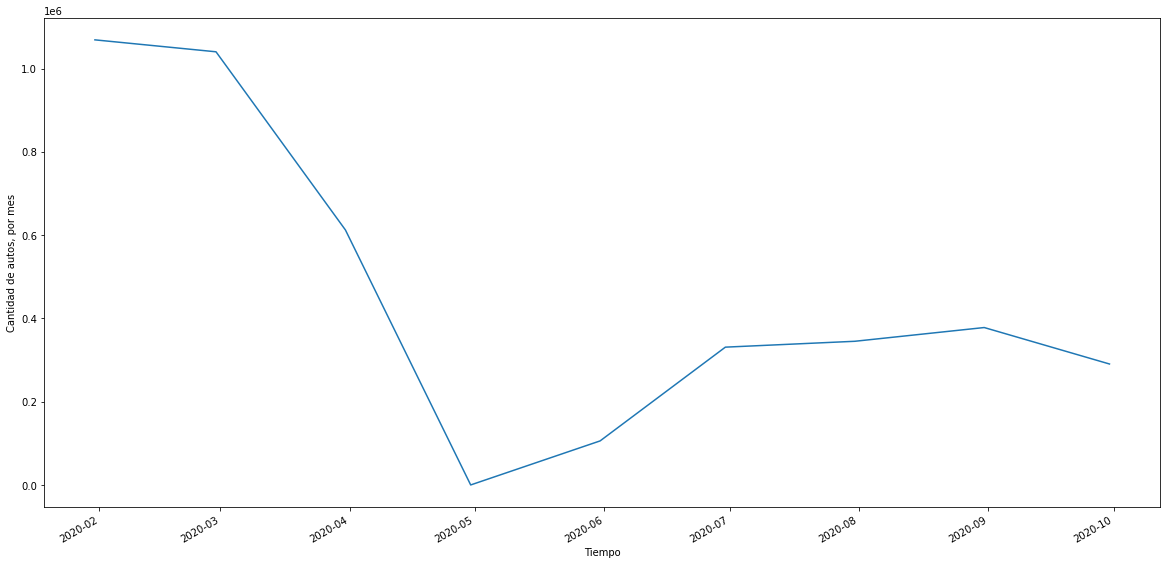

In [132]:
plt.figure(figsize = (20,10))
plt.plot(m20.index, m20.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.gcf().autofmt_xdate()
plt.show()

In [135]:
mask20 = (forecast['ds'] > '2020-01-01')
forecast2 = forecast[mask20]
forecast2.head()
forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
43,2020-08-31,13.896454,880761.872029,1.315355e+06,13.692142,14.096081,-0.002233,-0.002233,-0.002233,-0.002233,-0.002233,-0.002233,0.0,0.0,0.0,1.081891e+06
44,2020-09-30,13.891129,806999.406131,1.314195e+06,13.640655,14.128744,-0.035700,-0.035700,-0.035700,-0.035700,-0.035700,-0.035700,0.0,0.0,0.0,1.040726e+06
45,2020-10-31,13.885628,854140.949344,1.539192e+06,13.576989,14.170725,0.081786,0.081786,0.081786,0.081786,0.081786,0.081786,0.0,0.0,0.0,1.164048e+06
46,2020-11-30,13.880303,797608.741129,1.573804e+06,13.519531,14.206131,0.063727,0.063727,0.063727,0.063727,0.063727,0.063727,0.0,0.0,0.0,1.137144e+06
47,2020-12-31,13.874802,737749.655724,1.631076e+06,13.467136,14.257196,0.043199,0.043199,0.043199,0.043199,0.043199,0.043199,0.0,0.0,0.0,1.107927e+06


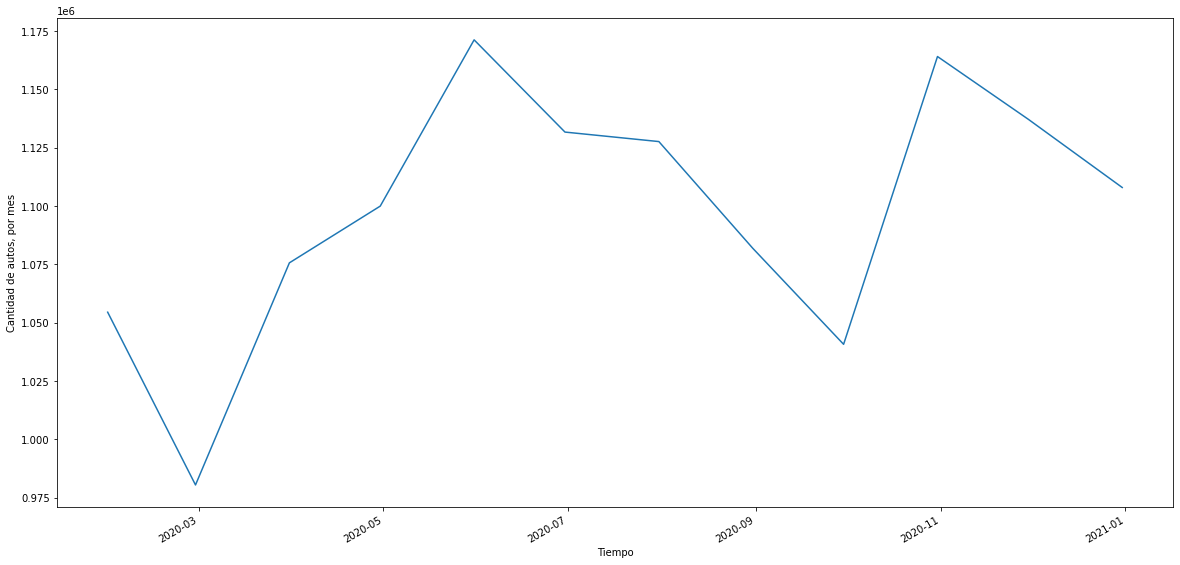

In [136]:
plt.figure(figsize = (20,10))
plt.plot(forecast2.ds, forecast2.yhat)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.gcf().autofmt_xdate()
plt.show()